In [3]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2 # opencv
import pickle

# tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical, normalize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load in data using pickle

In [4]:
X = pickle.load(open("./pickle/X_data.pkl", mode='rb'))
y = pickle.load(open("./pickle/y_data.pkl", mode='rb'))

# View images before splitting the data

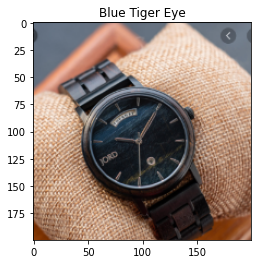

In [4]:
index = 800 # Change index value to evaluate the different types of tiger eye
plt.imshow(X[index]); # show the image

# show what the color of tiger eye is labeled as in "y": [red,blue,gold]
if y[index] == 0:
    title = 'Red Tiger Eye'
elif y[index] == 1:
    title = 'Blue Tiger Eye'
elif y[index] == 2:
    title = 'Gold Tiger Eye'
        

plt.title(f'{title}'); # Place label as title

### Baseline Accuracy

In [5]:
pd.Series(y.flatten()).value_counts(normalize=True) # credit to Caroline

2    0.485170
0    0.266047
1    0.248783
dtype: float64

# Train, test, and split the data. Then view images

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# View images after splitting the data

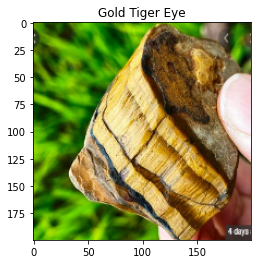

In [8]:
index = 9 # Change index value to evaluate the different types of tiger eye
plt.imshow(X_train[index]); # show the image

# show what the color of tiger eye is labeled as in "y": [red,blue,gold]
if y_train[index] == 0:
    title = 'Red Tiger Eye'
elif y_train[index] == 1:
    title = 'Blue Tiger Eye'
elif y_train[index] == 2:
    title = 'Gold Tiger Eye'
        

plt.title(f'{title}'); # Place label as title

### Hot Encode the y data

Convert labels into set of numbers to input into the neural network model

In [9]:
y_train = to_categorical(y_train)
y_train[0] # show the first array

array([0., 0., 1.], dtype=float32)

In [10]:
y_test = to_categorical(y_test)
y_test[1] # show the first array

array([1., 0., 0.], dtype=float32)

In [11]:
X_train.shape, X_test.shape

((1694, 200, 200, 3), (565, 200, 200, 3))

In [12]:
y_train.shape, y_test.shape

((1694, 3), (565, 3))

## Normalize data

In [13]:
# X_train = X_train / 255
# X_test = X_test / 255

# # y_train = y_train / 255
# # y_test = y_test / 255


____________
# Model

In [22]:
model = Sequential() # Instantiate Model
act = 'relu' # activation function into variable, "act"

# first layer
model.add( Conv2D( 32, kernel_size=(3,3), activation=act,padding='same', input_shape=(X_train[0].shape) ) )
model.add(BatchNormalization())
# model.add( MaxPooling2D( pool_size=(2, 2) ) )

# second layer
model.add( Conv2D( 32, kernel_size=(3,3), activation=act) )
model.add(BatchNormalization())
model.add( MaxPooling2D( pool_size=(2,2) ) )
model.add( Dropout(0.5) ) # dropout rate at 50%

# third layer
model.add( Conv2D( 16, kernel_size=(3,3), activation=act ) ) # layer with 64 neurons
model.add(BatchNormalization())

# fourth layer
model.add( Conv2D( 16, kernel_size=(3,3), activation=act ) ) # layer with 64 neurons
model.add(BatchNormalization())
model.add( MaxPooling2D( pool_size=(2,2) ) )
model.add( Dropout(0.5) ) # dropout rate at 50%
      
# fifth layer
model.add( Flatten() ) # Flatten Layer
model.add( Dense( 64, activation=act ) ) 
# model.add( Dense( 32, activation=act ) ) 
# model.add( Dense( 16, activation=act ) ) 

#output layer: last layer
model.add( Dense( 3, activation='softmax' ) )

#### Compile the model

In [23]:
model.compile (loss ='categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

#### Early Stop

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=5)

#### Visualize Model Structures

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 198, 198, 32)      9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 16)       

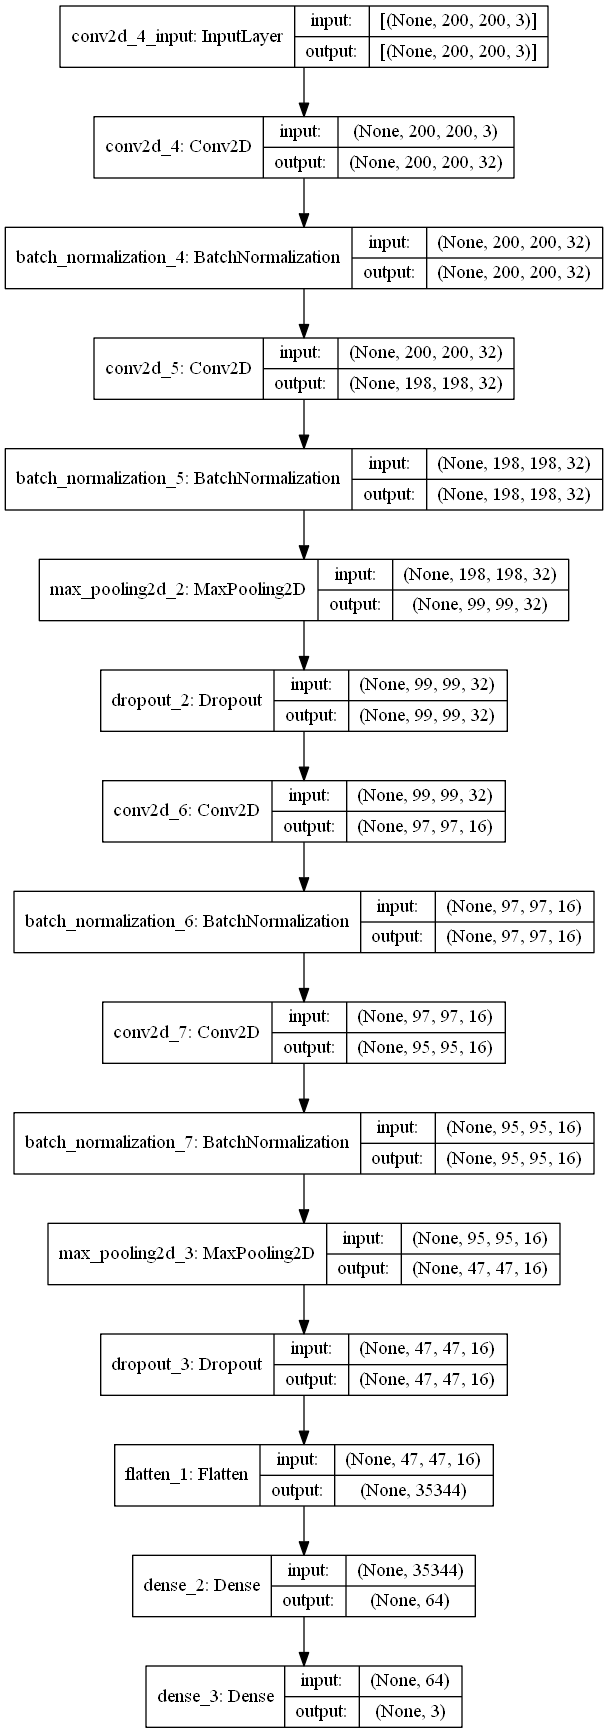

In [26]:
from tensorflow.keras.utils import plot_model
import pydot
plot_model(model,show_layer_names=True, show_shapes=True)

In [27]:
results = model.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_data=(X_test,y_test), callbacks=[early_stop])
results

Epoch 1/20
14/14 [==============================] - 186s 13s/step - loss: 5.4193 - accuracy: 0.3897 - val_loss: 1.1121 - val_accuracy: 0.5327
Epoch 2/20
14/14 [==============================] - 189s 13s/step - loss: 0.9348 - accuracy: 0.6031 - val_loss: 1.1276 - val_accuracy: 0.5062
Epoch 3/20
14/14 [==============================] - 187s 13s/step - loss: 0.7521 - accuracy: 0.6621 - val_loss: 1.1088 - val_accuracy: 0.5080
Epoch 4/20
14/14 [==============================] - 182s 13s/step - loss: 0.6819 - accuracy: 0.6761 - val_loss: 0.9294 - val_accuracy: 0.5841
Epoch 5/20
14/14 [==============================] - 183s 13s/step - loss: 0.6538 - accuracy: 0.6629 - val_loss: 0.8048 - val_accuracy: 0.6159
Epoch 6/20
14/14 [==============================] - 182s 13s/step - loss: 0.5920 - accuracy: 0.6862 - val_loss: 0.7451 - val_accuracy: 0.6920
Epoch 7/20
14/14 [==============================] - 183s 13s/step - loss: 0.5280 - accuracy: 0.7662 - val_loss: 1.1822 - val_accuracy: 0.7469
Epoch 

# Save Model

In [33]:
# saved model using keras instead of pickle
save_model(model,'./saved_model/model_13epoch.hdf5' )

# Visualize Accuracy

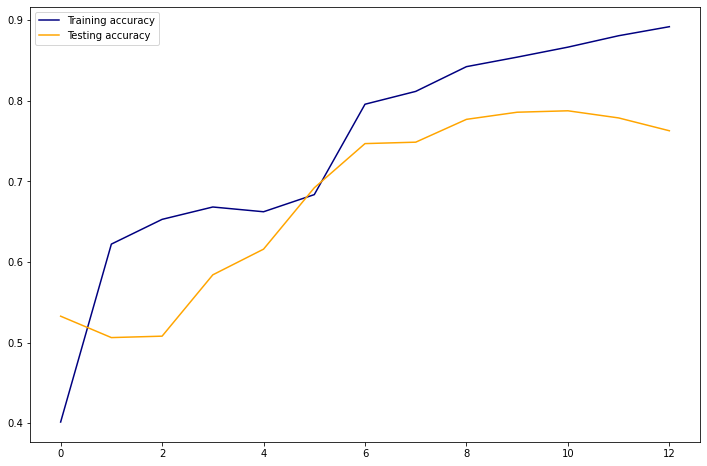

In [36]:
train_acc = results.history['accuracy']
test_acc = results.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training accuracy', color='navy')
plt.plot(test_acc, label='Testing accuracy', color='orange')
plt.legend();

plt.savefig("./visuals/accuracy.jpg")

# Visualize Loss

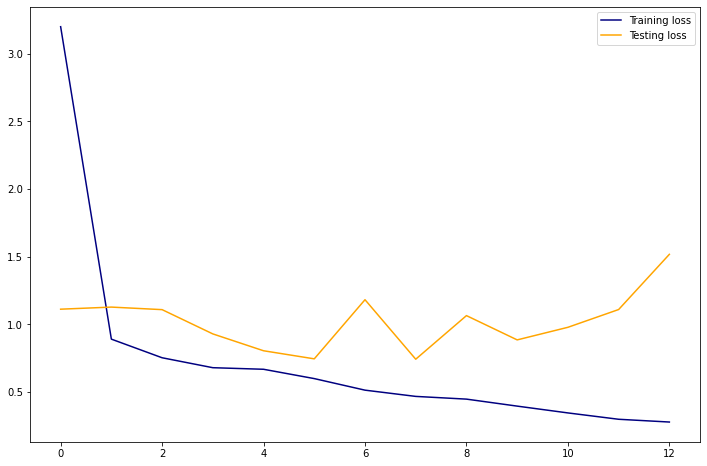

In [37]:
train_loss = results.history['loss']
test_loss = results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='orange')
plt.legend();
plt.savefig("./visuals/loss.jpg")